In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('LoanApprovalPrediction.csv')
print(data.head())

    Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             

In [4]:
data.drop(['Loan_ID'],axis=1,inplace=True)

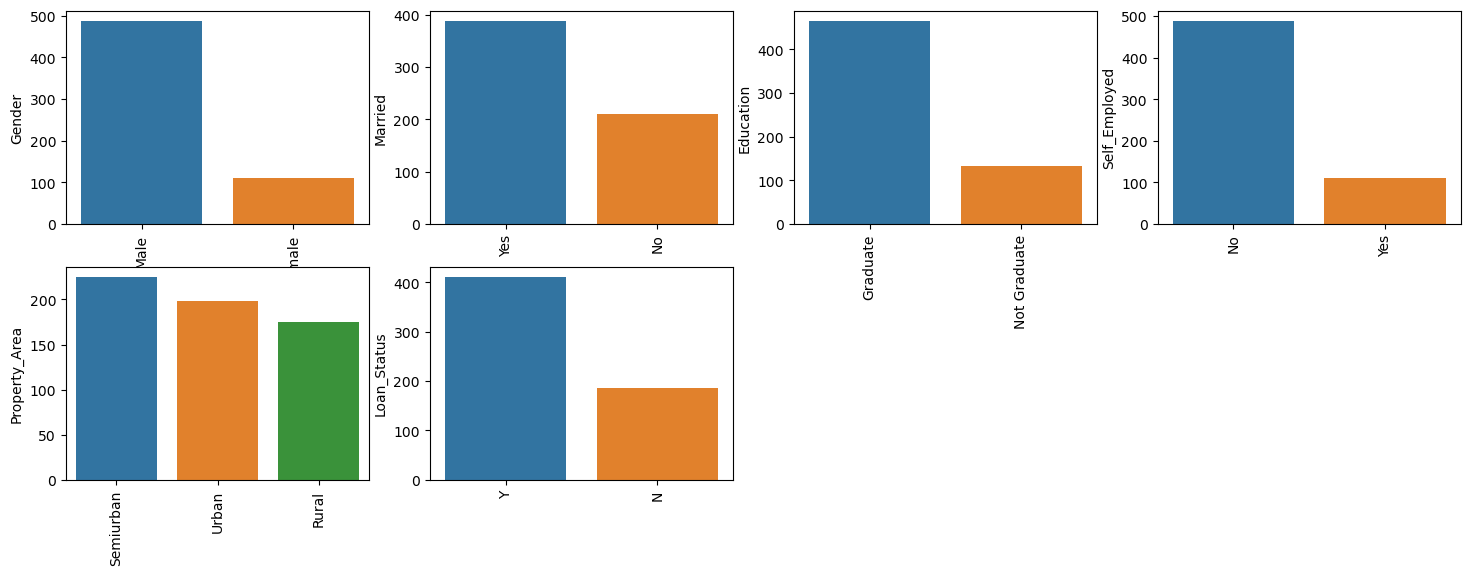

In [5]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1 
for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [6]:
print("Categorical variables:",len(object_cols))

Categorical variables: 6


In [7]:
lb=LabelEncoder()
for col in list(object_cols):
  data[col] = lb.fit_transform(data[col])

In [8]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())    
print(data.isna().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [10]:
X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=1)                                                   
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((418, 11), (180, 11), (418,), (180,))

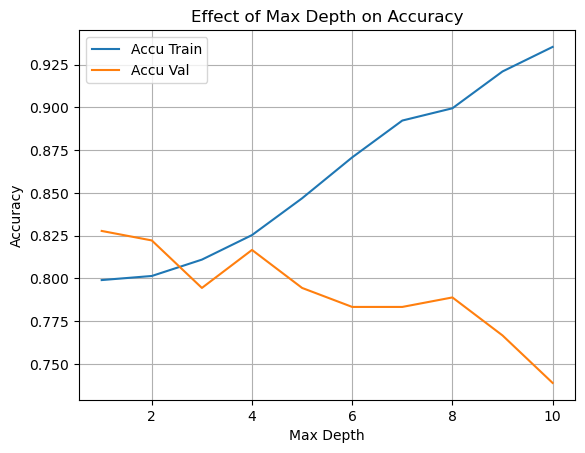

In [11]:
# making predictions on the training set
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accu_train_values = []
accu_val_values = []

from sklearn.tree import DecisionTreeClassifier


for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 2)
    model.fit(X_train,Y_train)
    y_predict_train = model.predict(X_train)
    y_predict_val = model.predict(X_test)
    accu_train = accuracy_score(Y_train,y_predict_train)
    accu_val = accuracy_score(Y_test,y_predict_val)
    accu_train_values.append(accu_train)
    accu_val_values.append(accu_val)
print(plt.plot(max_depth_values,accu_train_values, label = 'Accu Train'))
print(plt.plot(max_depth_values,accu_val_values, label = 'Accu Val'))
plt.legend()
plt.grid(axis='both')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Effect of Max Depth on Accuracy')
plt.show()


In [12]:
train_data=[]
val_data=[]
dt = DecisionTreeClassifier(max_depth=(4))

# Train Model.
dt.fit(X_train, Y_train)

# Predict the value of Train.
y_train_pred = dt.predict(X_train)
y_val_pred = dt.predict(X_test)
print('Decision tree accuracy')
#calclute precision,recall,f1_score to train data
precision_train = precision_score(Y_train, y_train_pred)
recall_train = recall_score(Y_train, y_train_pred)
accuracy_train = accuracy_score(Y_train, y_train_pred)
train_data.append(accuracy_train)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_train, 3),round(recall_train, 3), round(accuracy_train, 3)))
print('confusion matrix =',confusion_matrix(Y_train, y_train_pred))
print (classification_report(Y_train, y_train_pred))
#calclute precision,recall,f1_score to test data
precision_val = precision_score(Y_test, y_val_pred)
recall_val = recall_score(Y_test, y_val_pred)
accuracy_val = accuracy_score(Y_test, y_val_pred)
val_data.append(accuracy_val)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_val, 3),                                                       round(recall_val, 3), round(accuracy_val, 3)))
print(confusion_matrix(Y_test, y_val_pred))
print (classification_report(Y_test, y_val_pred))

Decision tree accuracy
Precision: 0.815 / Recall: 0.961 / Accuracy: 0.825
confusion matrix = [[ 71  62]
 [ 11 274]]
              precision    recall  f1-score   support

           0       0.87      0.53      0.66       133
           1       0.82      0.96      0.88       285

    accuracy                           0.83       418
   macro avg       0.84      0.75      0.77       418
weighted avg       0.83      0.83      0.81       418

Precision: 0.825 / Recall: 0.937 / Accuracy: 0.817
[[ 29  25]
 [  8 118]]
              precision    recall  f1-score   support

           0       0.78      0.54      0.64        54
           1       0.83      0.94      0.88       126

    accuracy                           0.82       180
   macro avg       0.80      0.74      0.76       180
weighted avg       0.81      0.82      0.81       180



In [13]:
from sklearn.linear_model import LogisticRegression  
lr=LogisticRegression()
# Train Model.
lr.fit(X_train, Y_train)
# Predict the value of Train.
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_test)
print('logistic regression')
#calclute precision,recall,f1_score to train data
precision_train = precision_score(Y_train, y_train_pred)
recall_train = recall_score(Y_train, y_train_pred)
accuracy_train = accuracy_score(Y_train, y_train_pred)
train_data.append(accuracy_train)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_train, 3),round(recall_train, 3), round(accuracy_train, 3)))
print('confusion matrix =',confusion_matrix(Y_train, y_train_pred))
print (classification_report(Y_train, y_train_pred))
#calclute precision,recall,f1_score to test data
precision_val = precision_score(Y_test, y_val_pred)
recall_val = recall_score(Y_test, y_val_pred)
accuracy_val = accuracy_score(Y_test, y_val_pred)
val_data.append(accuracy_val)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_val, 3),                                                       round(recall_val, 3), round(accuracy_val, 3)))
print(confusion_matrix(Y_test, y_val_pred))
print (classification_report(Y_test, y_val_pred))

logistic regression
Precision: 0.787 / Recall: 0.972 / Accuracy: 0.801
confusion matrix = [[ 58  75]
 [  8 277]]
              precision    recall  f1-score   support

           0       0.88      0.44      0.58       133
           1       0.79      0.97      0.87       285

    accuracy                           0.80       418
   macro avg       0.83      0.70      0.73       418
weighted avg       0.82      0.80      0.78       418

Precision: 0.813 / Recall: 0.968 / Accuracy: 0.822
[[ 26  28]
 [  4 122]]
              precision    recall  f1-score   support

           0       0.87      0.48      0.62        54
           1       0.81      0.97      0.88       126

    accuracy                           0.82       180
   macro avg       0.84      0.72      0.75       180
weighted avg       0.83      0.82      0.80       180



In [14]:
#random forest
from sklearn.ensemble import RandomForestClassifier

# Take object from model.
rf = RandomForestClassifier(max_depth=(4))

# Train Model.
rf.fit(X_train, Y_train)

y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_test)
print('Random forest accuracy')
#calclute precision,recall,f1_score to train data
precision_train = precision_score(Y_train, y_train_pred)
recall_train = recall_score(Y_train, y_train_pred)
accuracy_train = accuracy_score(Y_train, y_train_pred)
train_data.append(accuracy_train)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_train, 3),round(recall_train, 3), round(accuracy_train, 3)))
print('confusion matrix =',confusion_matrix(Y_train, y_train_pred))
print (classification_report(Y_train, y_train_pred))
#calclute precision,recall,f1_score to test data
precision_val = precision_score(Y_test, y_val_pred)
recall_val = recall_score(Y_test, y_val_pred)
accuracy_val = accuracy_score(Y_test, y_val_pred)
val_data.append(accuracy_val)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_val, 3),                                                       round(recall_val, 3), round(accuracy_val, 3)))
print(confusion_matrix(Y_test, y_val_pred))
print (classification_report(Y_test, y_val_pred))

Random forest accuracy
Precision: 0.782 / Recall: 0.982 / Accuracy: 0.801
confusion matrix = [[ 55  78]
 [  5 280]]
              precision    recall  f1-score   support

           0       0.92      0.41      0.57       133
           1       0.78      0.98      0.87       285

    accuracy                           0.80       418
   macro avg       0.85      0.70      0.72       418
weighted avg       0.82      0.80      0.78       418

Precision: 0.812 / Recall: 0.992 / Accuracy: 0.833
[[ 25  29]
 [  1 125]]
              precision    recall  f1-score   support

           0       0.96      0.46      0.62        54
           1       0.81      0.99      0.89       126

    accuracy                           0.83       180
   macro avg       0.89      0.73      0.76       180
weighted avg       0.86      0.83      0.81       180



In [ ]:
from sklearn.svm import SVC

# Take object from the model.
dts= SVC(kernel = 'poly', degree = 5, random_state = 1, C = 50)

# Train Model.
dts.fit(X_train, Y_train)

# Predict the value of Train.
y_train_pred = dts.predict(X_train)
y_val_pred = dts.predict(X_test)
print('support vector machine')
#calclute precision,recall,f1_score to train data
precision_train = precision_score(Y_train, y_train_pred)
recall_train = recall_score(Y_train, y_train_pred)
accuracy_train = accuracy_score(Y_train, y_train_pred)
train_data.append(accuracy_train)
print('Precision: {} / Recall: {} / Accuracy: {}' .format(round(precision_train, 3),round(recall_train, 3), round(accuracy_train, 3)))
print('confusion matrix =',confusion_matrix(Y_train, y_train_pred))
print (classification_report(Y_train, y_train_pred))
#calclute precision,recall,f1_score to test data
precision_val = precision_score(Y_test, y_val_pred)
recall_val = recall_score(Y_test, y_val_pred)
accuracy_val = accuracy_score(Y_test, y_val_pred)
val_data.append(accuracy_val)
print('Precision: {} / Recall: {} / Accuracy: {}',format(round(precision_val, 3),round(recall_val, 3), round(accuracy_val, 3)))
print(confusion_matrix(Y_test, y_val_pred))
print (classification_report(Y_test, y_val_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train,Y_train)
y_train_pred = classifier.predict(X_train)
y_val_pred = classifier.predict(X_test)
print('KNN accuracy')
#calclute precision,recall,f1_score to train data
precision_train = precision_score(Y_train, y_train_pred)
recall_train = recall_score(Y_train, y_train_pred)
accuracy_train = accuracy_score(Y_train, y_train_pred)
train_data.append(accuracy_train)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_train, 3),round(recall_train, 3), round(accuracy_train, 3)))
print('confusion matrix =',confusion_matrix(Y_train, y_train_pred))
print (classification_report(Y_train, y_train_pred))
#calclute precision,recall,f1_score to test data
precision_val = precision_score(Y_test, y_val_pred)
recall_val = recall_score(Y_test, y_val_pred)
accuracy_val = accuracy_score(Y_test, y_val_pred)
val_data.append(accuracy_val)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_val, 3),                                                       round(recall_val, 3), round(accuracy_val, 3)))
print(confusion_matrix(Y_test, y_val_pred))
print (classification_report(Y_test, y_val_pred))

In [ ]:
all_result = {
    'model': [],
    'train': [],
    'val': []
}

all_result['model'] = ['DECISION_TREE', 'LOGISTIC', 'random_forest','SVM', 'KNN']
all_result['train'] = train_data
all_result['val'] = val_data
All_result = pd.DataFrame(all_result)

print(All_result)

In [ ]:
All_result.plot.bar(x = 'model', y = ['train', 'val'], figsize = (20, 20))
plt.yticks(np.arange(0.0,1.1,0.1))
plt.grid(axis = 'y')
plt.legend()
plt.show()
